In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [4]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (19689, 10)


In [5]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [7]:
# to check the unique values
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()


****************************** Crop *********************************

{'Sannhamp', 'Safflower', 'Jowar', 'Oilseeds total', 'Ginger', 'Sunflower', 'Urad', 'Horse-gram', 'Tobacco', 'Mesta', 'Dry chillies', 'Other Kharif pulses', 'Ragi', 'Other  Rabi pulses', 'Potato', 'Tapioca', 'Khesari', 'Masoor', 'Cashewnut', 'Gram', 'Cowpea(Lobia)', 'Moth', 'Linseed', 'Coconut ', 'Black pepper', 'Moong(Green Gram)', 'Small millets', 'Cardamom', 'Jute', 'Bajra', 'Coriander', 'Arhar/Tur', 'Banana', 'Maize', 'Niger seed', 'Wheat', 'Onion', 'Garlic', 'Sesamum', 'Other Summer Pulses', 'Peas & beans (Pulses)', 'Groundnut', 'Rice', 'other oilseeds', 'Turmeric', 'Soyabean', 'Sweet potato', 'Arecanut', 'Barley', 'Rapeseed &Mustard', 'Castor seed', 'Sugarcane', 'Guar seed', 'Other Cereals', 'Cotton(lint)'}

****************************** Crop_Year *********************************

{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20

In [8]:
# Check the duplicates record
df.duplicated().sum()


0

In [9]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


<function matplotlib.pyplot.show(close=None, block=None)>

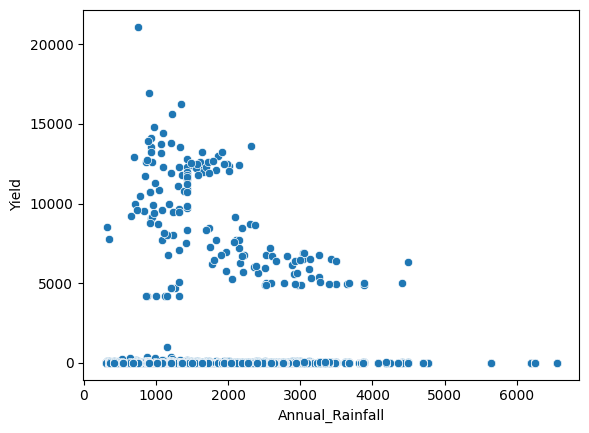

In [10]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show

In [11]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [12]:
year_yield = df_year.groupby('Crop_Year').sum() 
year_yield

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,
1997,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592
1998,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483
1999,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395
2000,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827
2001,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447
2002,1.427858e+08,12409349456,1.040622e+06,1.351753e+10,3.569644e+07,65734.814831
2003,1.496968e+08,12313711969,1.135610e+06,1.481699e+10,3.592724e+07,67039.368873
2004,1.480245e+08,13817065380,1.141189e+06,1.603697e+10,3.108514e+07,63905.917053
2005,1.479183e+08,14951210018,1.185828e+06,1.773836e+10,3.106285e+07,70140.586280


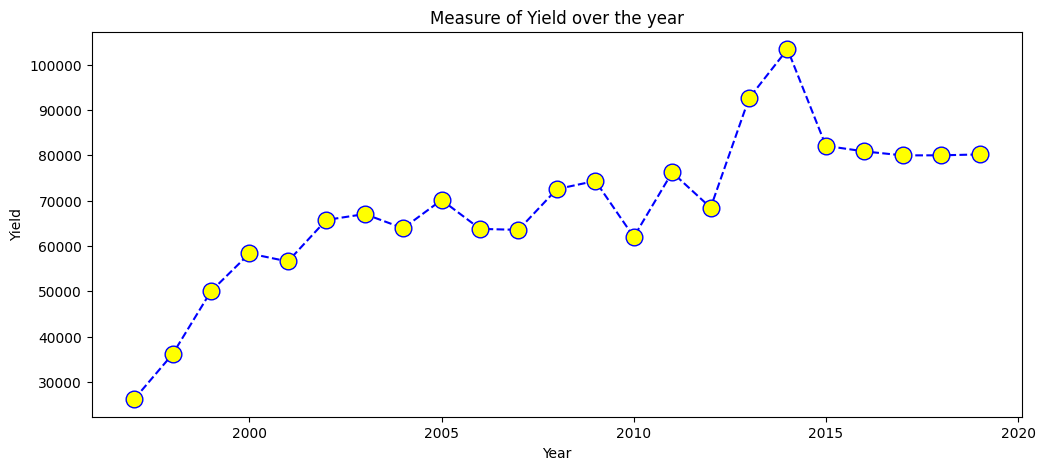

In [13]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

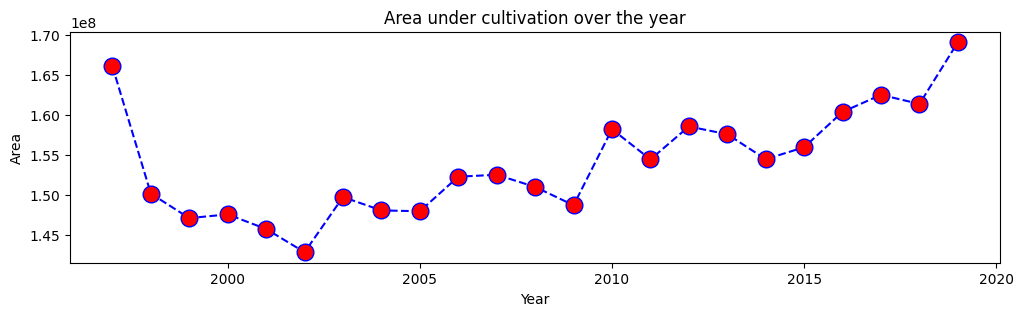

In [14]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

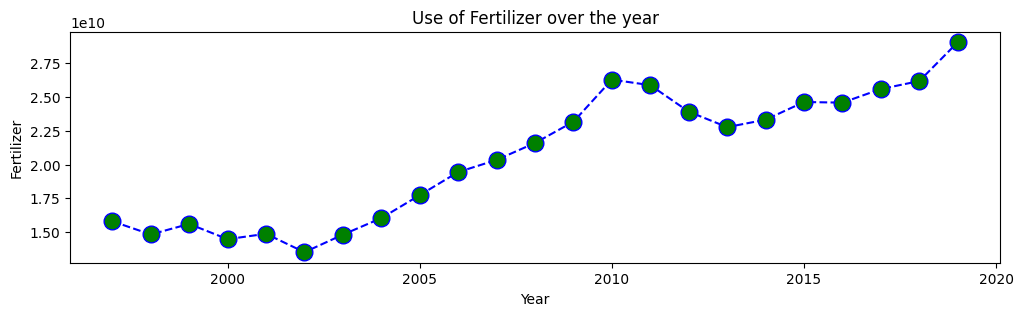

In [15]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

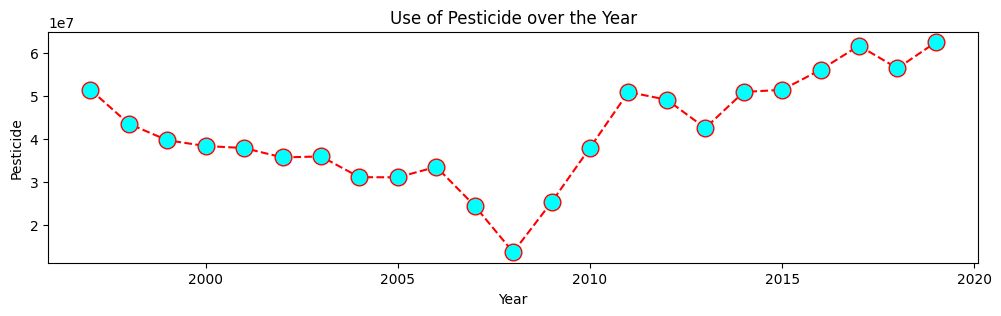

In [16]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

In [17]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
State,,,,,,,
West Bengal,2196856,2.376823e+08,8941179120,1.883456e+06,2.970480e+10,6.612665e+07,291986.752179
Puducherry,1346899,6.535410e+05,493815573,9.599160e+05,8.480729e+07,1.705159e+05,232163.600840
Andhra Pradesh,2543550,2.389253e+08,26076218605,1.160140e+06,3.125890e+10,6.210724e+07,229735.184723
Tamil Nadu,1652030,1.103728e+08,78051759253,7.654142e+05,1.473239e+10,2.956305e+07,185813.281648
Assam,1468138,7.734260e+07,3637714928,1.531493e+06,1.029304e+10,2.093547e+07,160612.648362
Karnataka,2876568,2.579074e+08,63772797366,1.692393e+06,3.458024e+10,6.917312e+07,151391.867808
Kerala,1072892,3.639106e+07,129700649853,1.536641e+06,4.744603e+09,9.647595e+06,147710.353263
Goa,494067,2.749600e+06,2193998349,8.247461e+05,3.581078e+08,7.506114e+05,87275.955000
Telangana,800319,3.979214e+07,147700034,3.955095e+05,6.262533e+09,1.356572e+07,39508.727733


In [18]:
df_state['Region'] = ['States' for i in range(len(df_state))]

fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
fig.show()

In [19]:
### From the above graph it can be observed that the yield of West Bengal is highest. Reason can be more annual rainfall, use of fertilizers

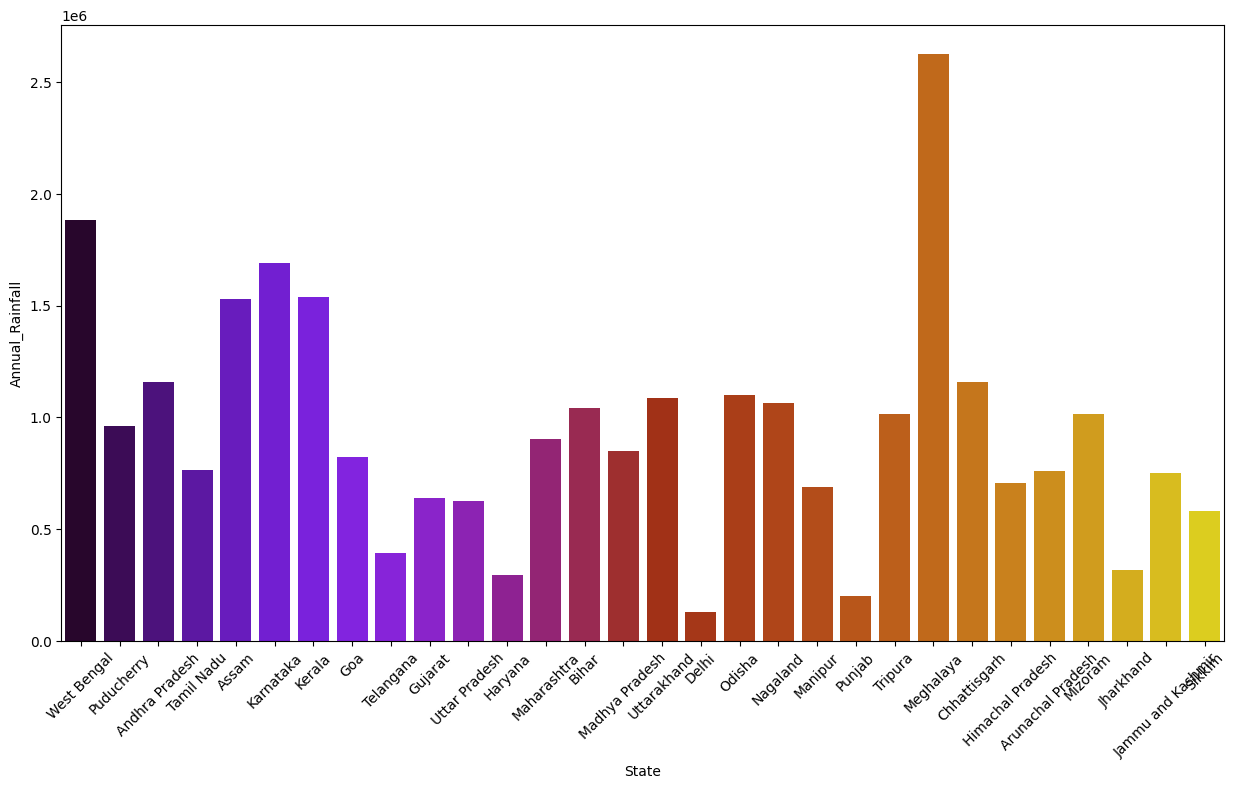

In [20]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

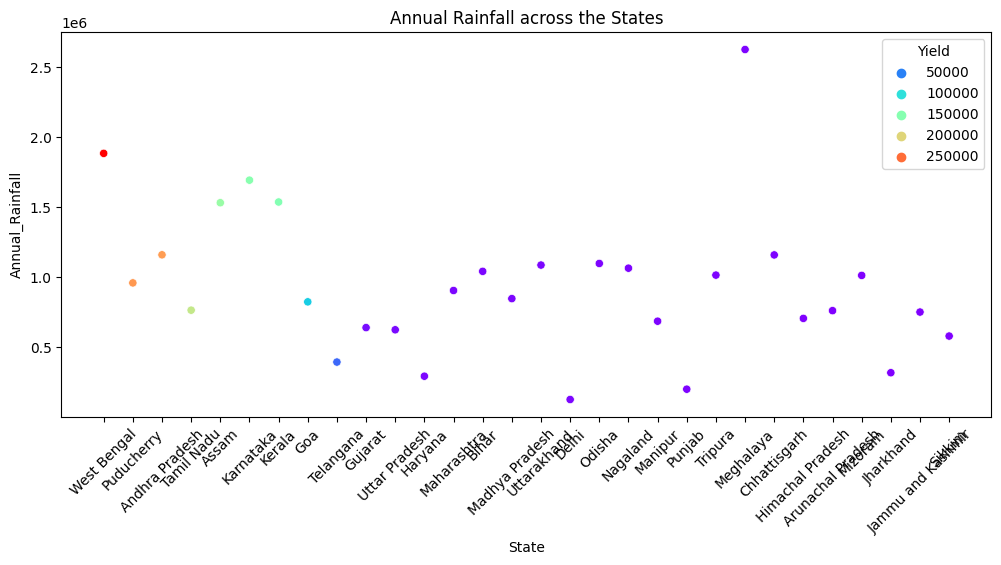

In [21]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

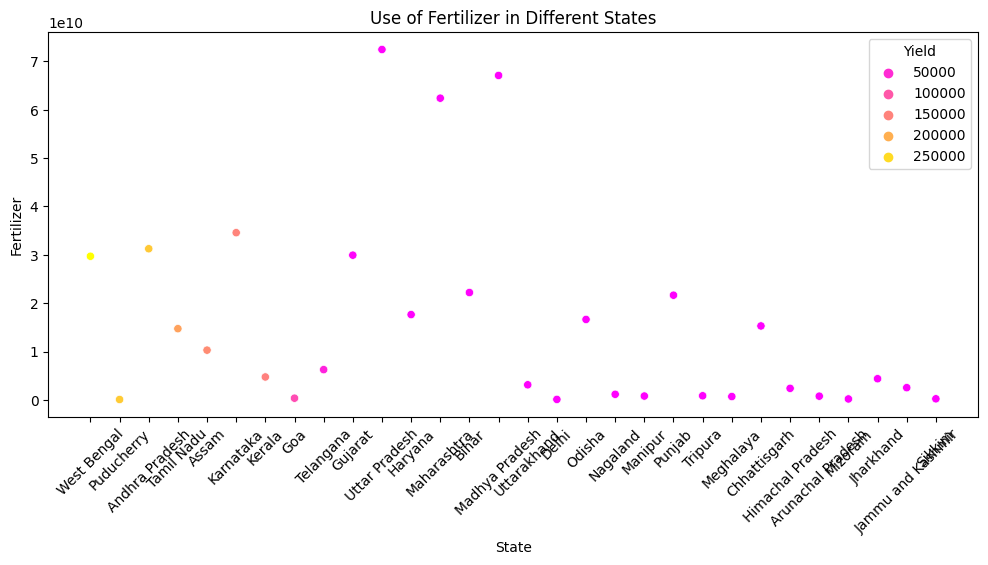

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()

In [23]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Season,,,,,,,
Autumn,832058,5.862637e+07,84406651,7.031759e+05,7.696200e+09,1.552829e+07,1621.837556
Kharif,16538965,1.702742e+09,5402484780,1.131835e+07,2.282723e+11,4.624902e+08,20431.840607
Rabi,11539594,1.172588e+09,2837368229,7.970757e+06,1.564345e+11,3.218366e+08,11418.068860
Summer,2402524,9.879112e+07,243731156,1.565900e+06,1.371903e+10,2.732111e+07,3581.857123
Winter,781718,2.806847e+08,586507936,6.709910e+05,3.811857e+10,7.590270e+07,2056.746957


In [24]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

In [25]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])                
fig.show()

In [26]:
# Where the Yield is zero
df_yz = df[df['Yield']==0]
df_yz.shape

(112, 10)

In [27]:
df_yz.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
92,Cardamom,1997,Whole Year,West Bengal,2674.0,7,1852.9,254484.58,828.94,0.0
125,Sunflower,1997,Whole Year,West Bengal,278.0,1,1852.9,26457.26,86.18,0.0
1058,Soyabean,2002,Kharif,Andhra Pradesh,41284.0,0,648.1,3908356.28,10321.00,0.0
1134,other oilseeds,2002,Whole Year,Kerala,2253.0,0,2511.2,213291.51,563.25,0.0
1135,Arecanut,2002,Whole Year,Tamil Nadu,4956.0,0,315.9,469184.52,1239.00,0.0


<Figure size 2500x1500 with 0 Axes>

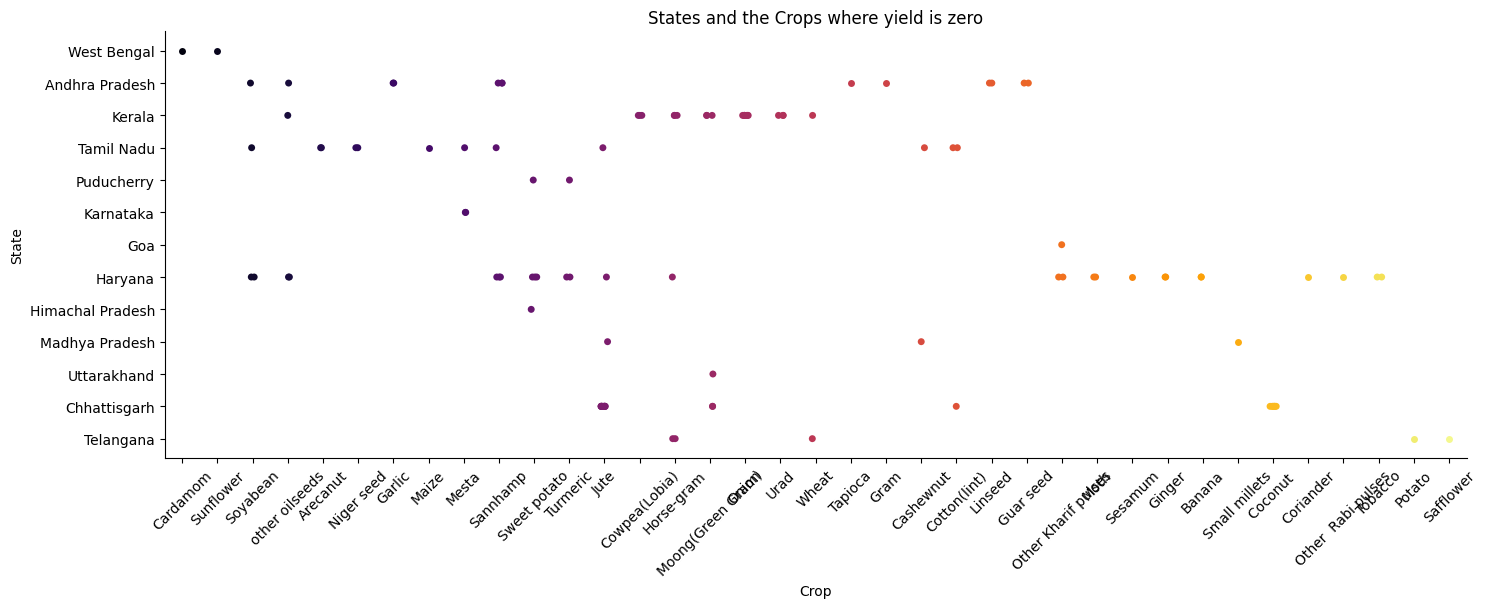

In [28]:
plt.figure(figsize = (25,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=45)
plt.title('States and the Crops where yield is zero')
plt.show()

In [29]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,
Arecanut,321347,8.765158e+06,39144261,3.414578e+05,1.226556e+09,2.449481e+06,3.359289e+02
Arhar/Tur,1020541,8.235357e+07,60913833,7.103078e+05,1.121027e+10,2.280705e+07,4.914127e+02
Bajra,1052589,9.335810e+07,118137047,5.566748e+05,1.205114e+10,2.465983e+07,1.271990e+03
Banana,488061,7.127321e+06,226471979,4.199956e+05,9.805713e+08,1.916819e+06,6.578526e+03
Barley,596557,9.270084e+06,19498687,3.474722e+05,1.190739e+09,2.472432e+06,4.738754e+02
Black pepper,253163,4.362226e+06,2095650,2.700002e+05,5.699445e+08,1.150606e+06,1.045302e+02
Cardamom,146569,1.305532e+06,255490,1.241488e+05,1.714790e+08,3.433323e+05,1.245829e+01
Cashewnut,265313,7.472794e+06,3737207,2.581485e+05,1.005401e+09,2.003926e+06,4.181387e+02
Castor seed,602681,1.659632e+07,24049211,4.144262e+05,2.248189e+09,4.560667e+06,2.080828e+02


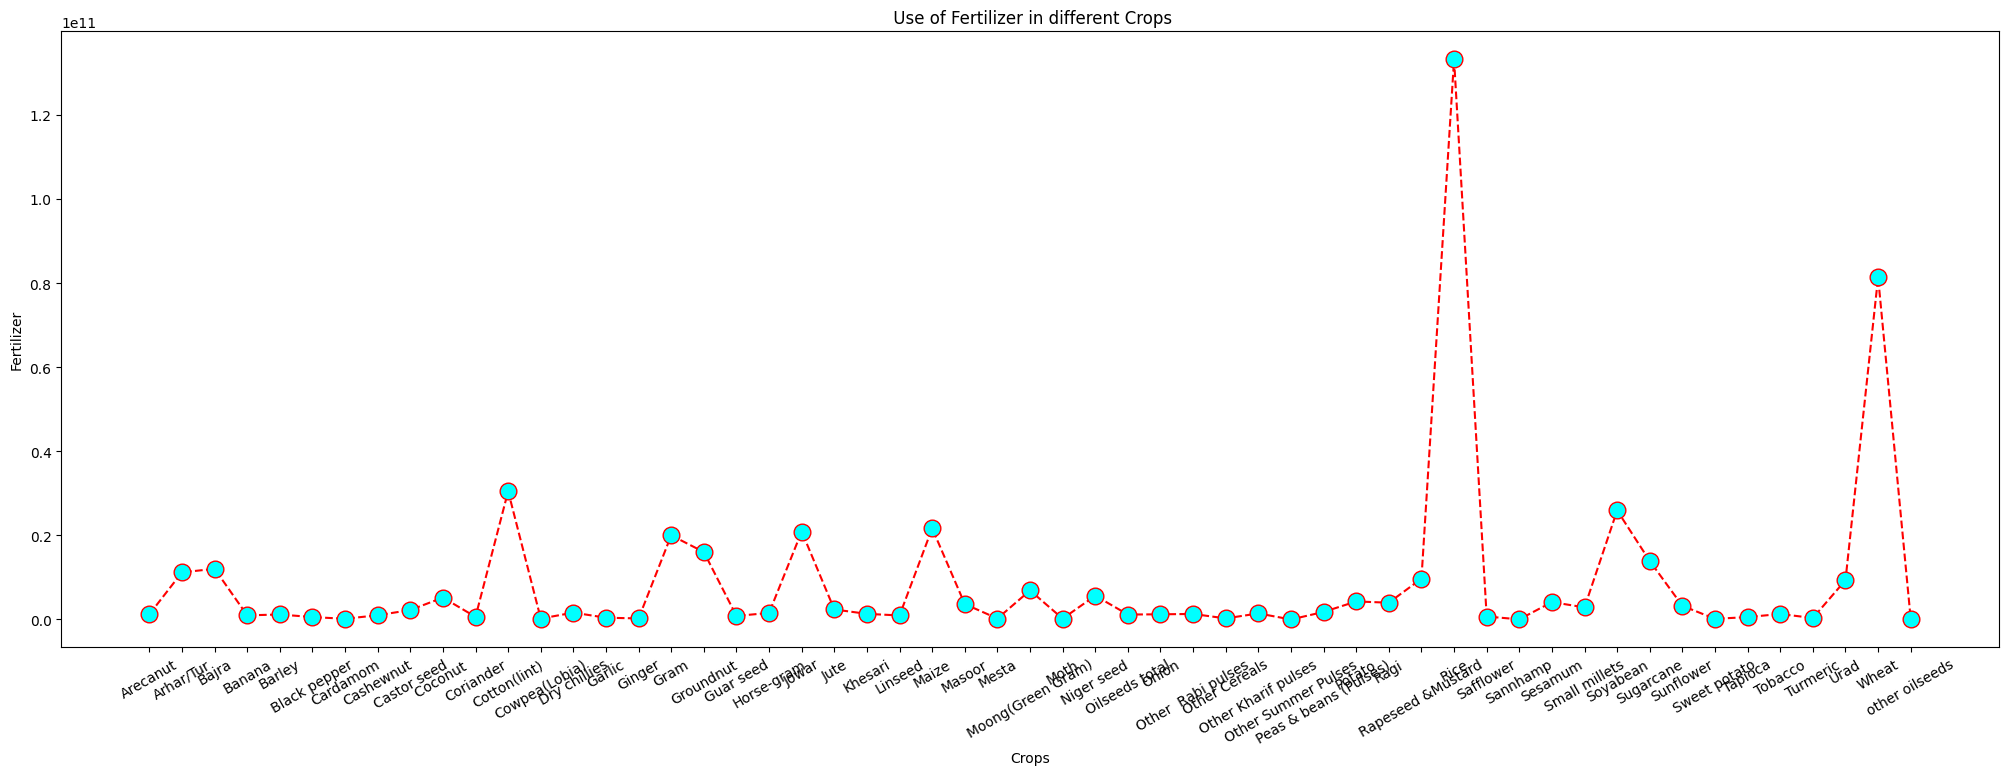

In [30]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()

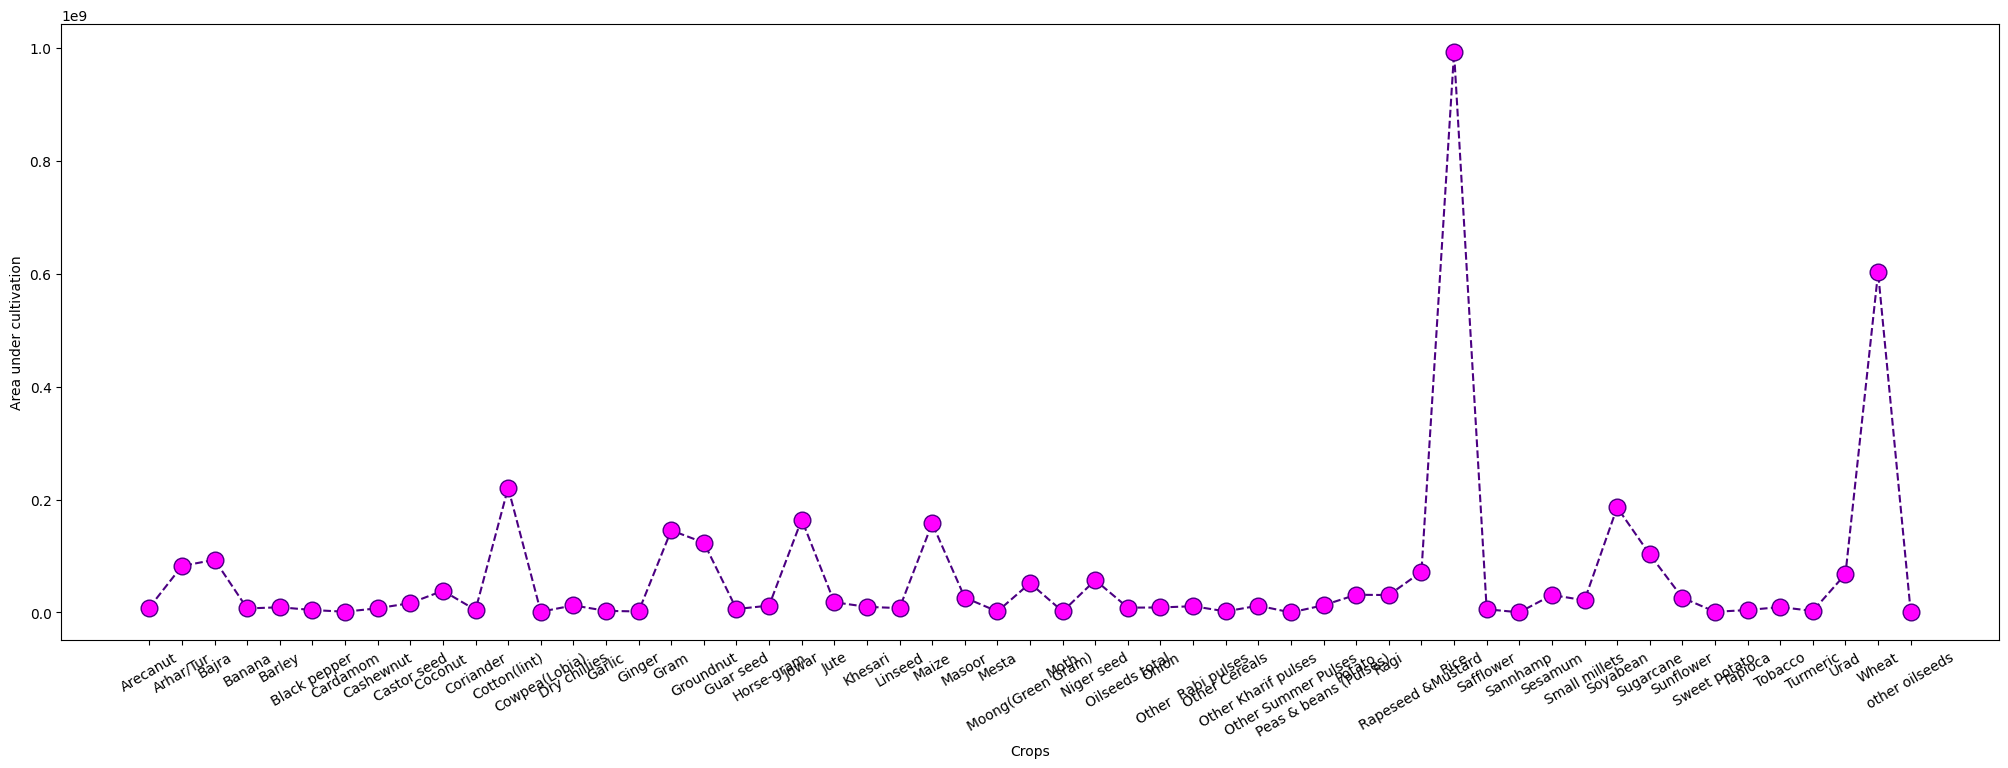

In [31]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

In [32]:
df_wheat = df[df['Crop']=='Wheat']
df_wheat.reset_index(drop=True,inplace=True)
df_wheat

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Wheat,1997,Rabi,Assam,84698.0,110054,2051.4,8060708.66,26256.38,1.259524
1,Wheat,1997,Rabi,Karnataka,250698.0,118512,1266.7,23858928.66,77716.38,0.548333
2,Wheat,1997,Rabi,Meghalaya,4287.0,6894,3818.2,407993.79,1328.97,1.385000
3,Wheat,1997,Rabi,West Bengal,367374.0,810480,1852.9,34962983.58,113885.94,1.886667
4,Wheat,1998,Rabi,Assam,89591.0,90509,2354.4,8851590.80,25981.39,0.999545
...,...,...,...,...,...,...,...,...,...,...
540,Wheat,2016,Summer,Odisha,57.0,80,1460.5,8735.25,19.95,0.950000
541,Wheat,2017,Summer,Odisha,73.0,158,1344.4,11493.12,27.74,2.387143
542,Wheat,2018,Summer,Odisha,147.0,268,1635.9,23843.40,51.45,1.825000
543,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000


In [33]:
df_wheat1 = df_wheat[df_wheat['Crop_Year']!=2020]
df_wheat_year = df_wheat1.groupby('Crop_Year').sum()
df_wheat_year

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,
1997,23500898.00,57999331,26765.700000,2.236580e+09,7.285278e+06,27.898176
1998,24431921.00,63793372,36709.200000,2.413874e+09,7.085257e+06,37.380180
1999,24503856.00,69250974,24912.400000,2.600594e+09,6.616041e+06,36.165537
2000,23338921.00,64029373,32021.900000,2.291182e+09,6.068119e+06,40.728373
2001,24027129.00,66343193,30835.900000,2.453891e+09,6.247054e+06,41.967366
2002,23410674.69,60953946,30737.700000,2.216289e+09,5.852669e+06,42.687343
2003,24734430.70,66979279,34939.400000,2.448214e+09,5.936263e+06,43.222580
2004,24789592.58,63933294,35241.300000,2.685704e+09,5.205814e+06,44.138495
2005,24101857.23,61514930,34308.900000,2.890295e+09,5.061390e+06,40.127099


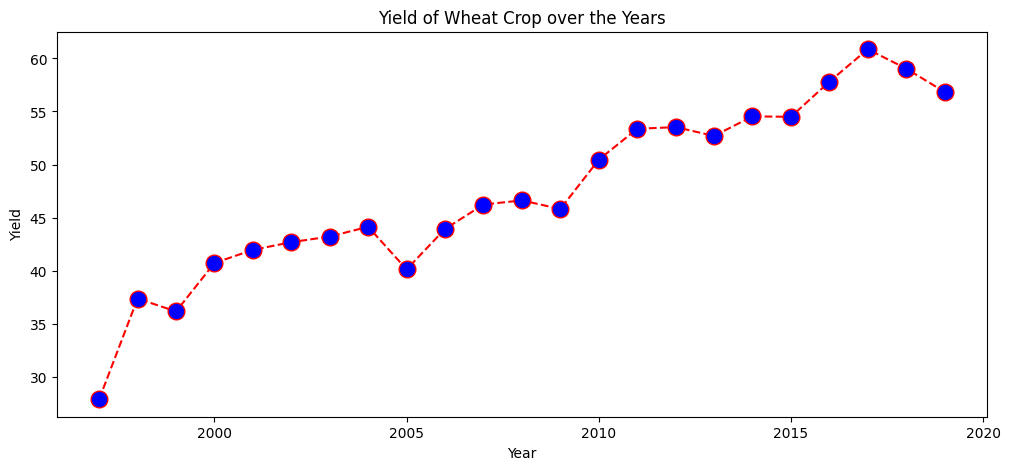

In [34]:
plt.figure(figsize = (12,5))
plt.plot(df_wheat_year.index, df_wheat_year['Yield'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield of Wheat Crop over the Years')
plt.show()

In [35]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year','Pesticide'], axis = 1)

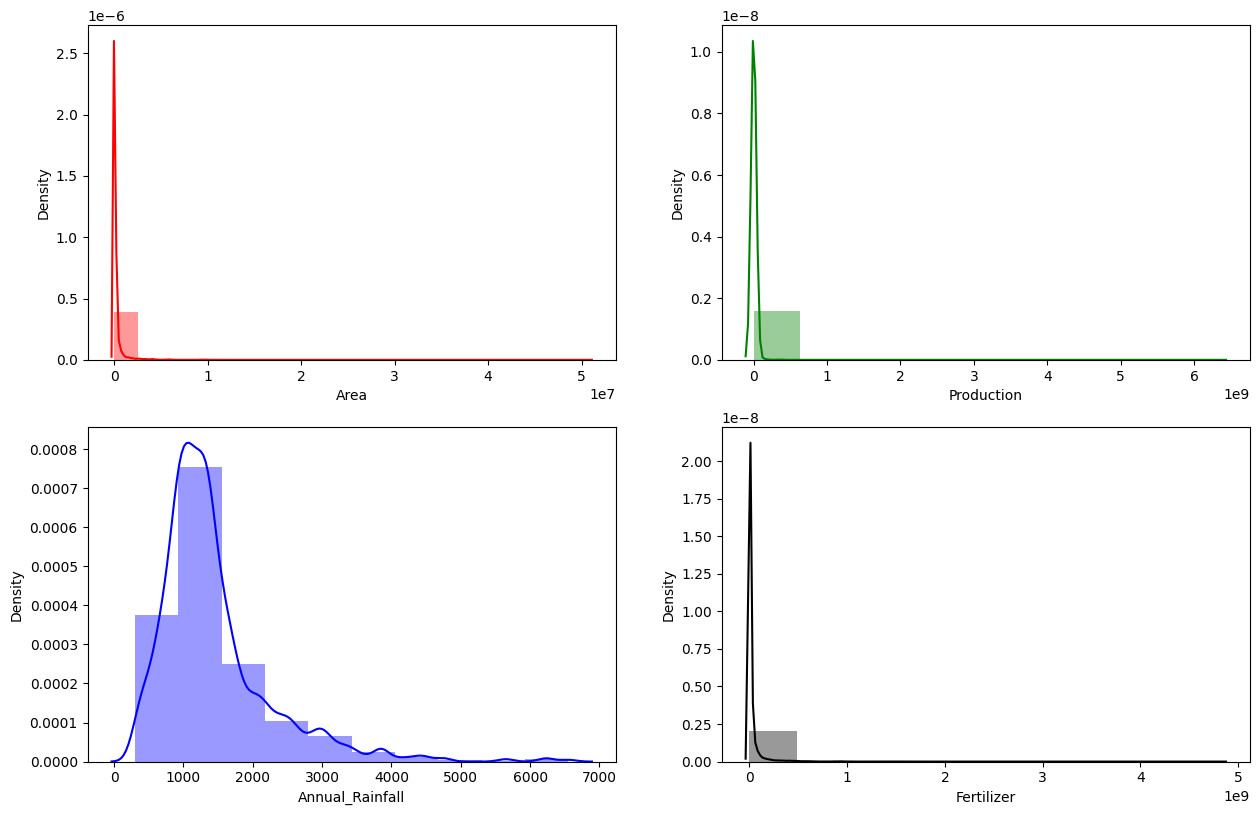

In [36]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df1['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df1['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df1['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(df1['Fertilizer'],bins = 10, color = 'black')
plt.show()

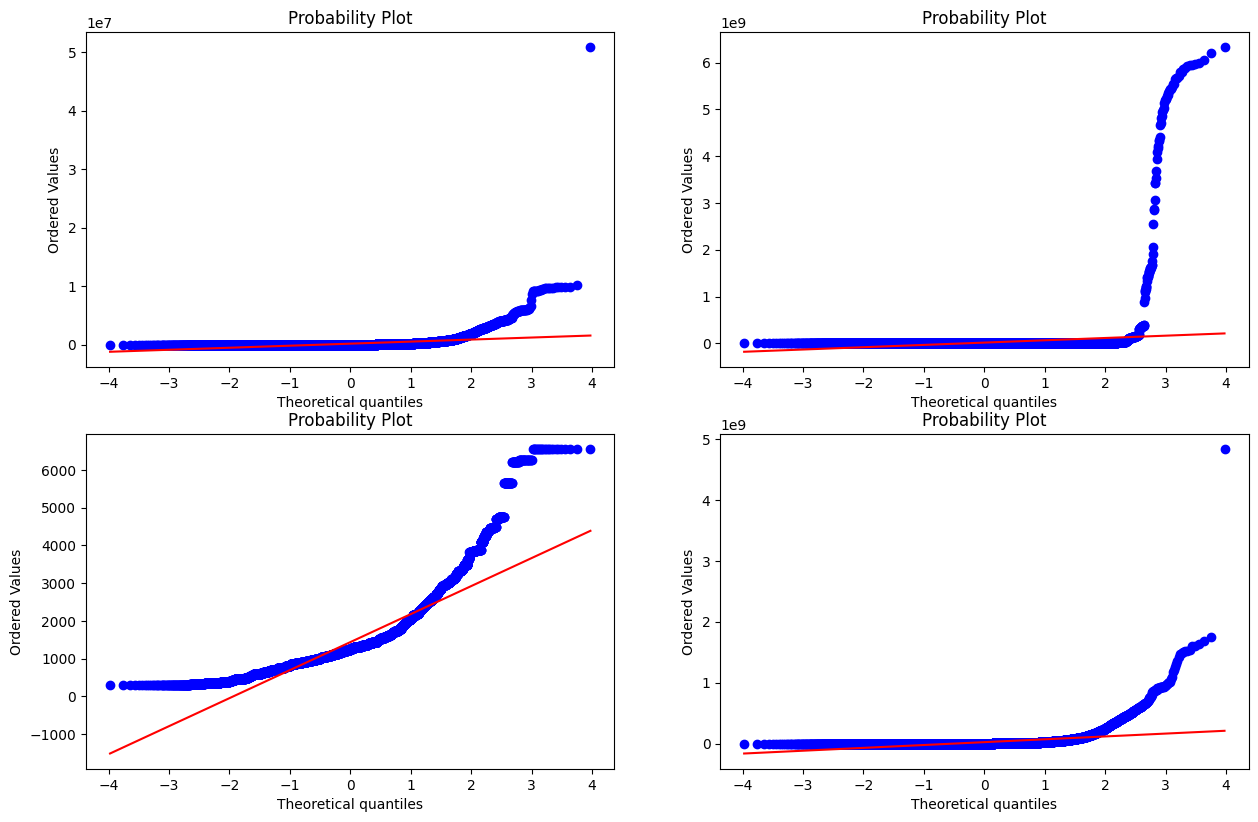

In [37]:
# Q-Q plot of the dataset
import scipy.stats as stats

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df1['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df1['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df1['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df1['Fertilizer'], dist = 'norm', plot = plt)
plt.show()

In [38]:
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [39]:
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=True)

In [40]:
df1.shape

(19689, 93)

In [41]:
df1.head()

,Area,Production,Annual_Rainfall,Fertilizer,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0.796087,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6637.0,4685,2051.4,631643.29,0.710435,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,796.0,22,2051.4,75755.32,0.238333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19656.0,126905000,2051.4,1870661.52,5238.051739,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1739.0,794,2051.4,165500.63,0.420909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x = df1.drop(['Yield'], axis = 1)
y = df1[['Yield']]

In [43]:
print(x.shape)
y.shape

(19689, 92)


(19689, 1)

In [44]:
x.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6637.0,4685,2051.4,631643.29,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,796.0,22,2051.4,75755.32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19656.0,126905000,2051.4,1870661.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1739.0,794,2051.4,165500.63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y.head()

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909


In [46]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [47]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((15751, 92), (3938, 92), (15751, 1), (3938, 1))

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

In [49]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-1.075788,-0.715962,0.0,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-1.522011,-1.187932,0.0,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-1.239694,-1.428779,0.0,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.247029,0.197346,0.0,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,1.485555,0.978650,0.0,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


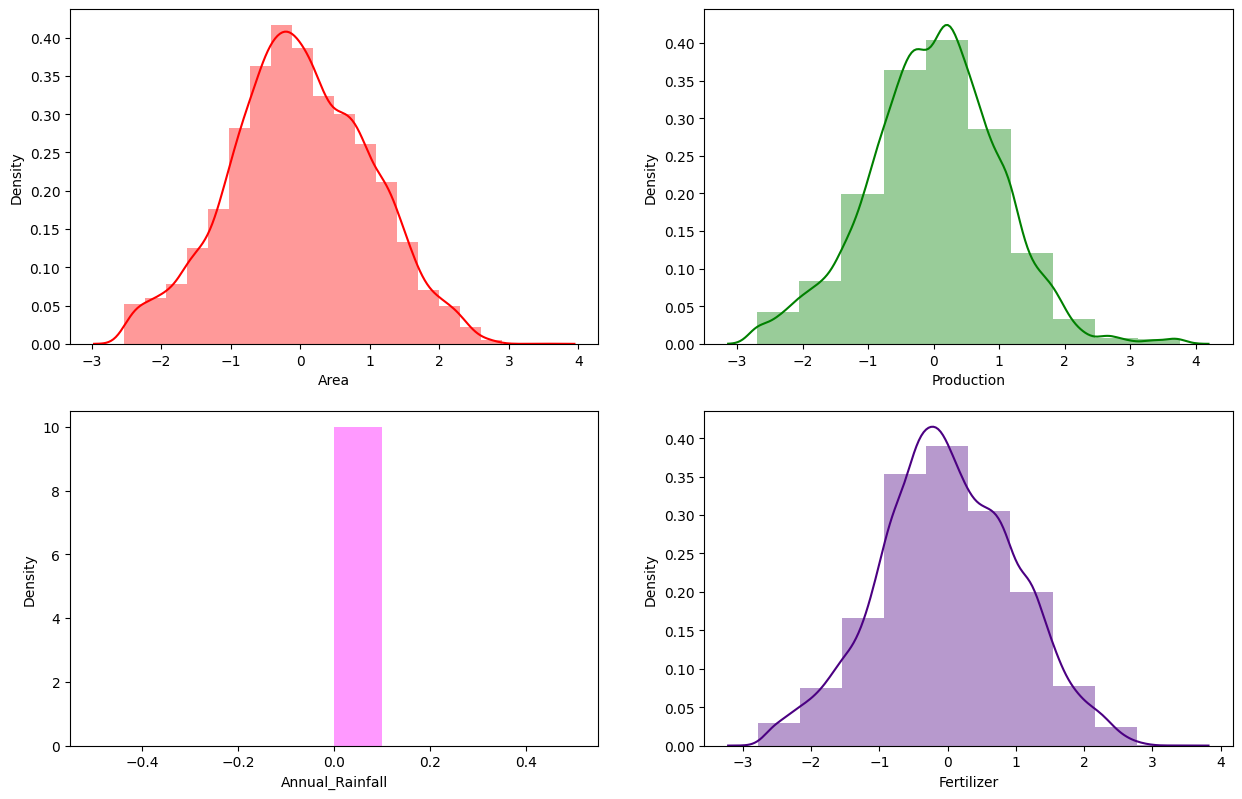

In [50]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df_trans['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df_trans['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df_trans['Annual_Rainfall'],bins = 10,color = 'fuchsia')
plt.subplot(4,2,4)
sns.distplot(df_trans['Fertilizer'],bins = 10, color = 'indigo')

plt.show()

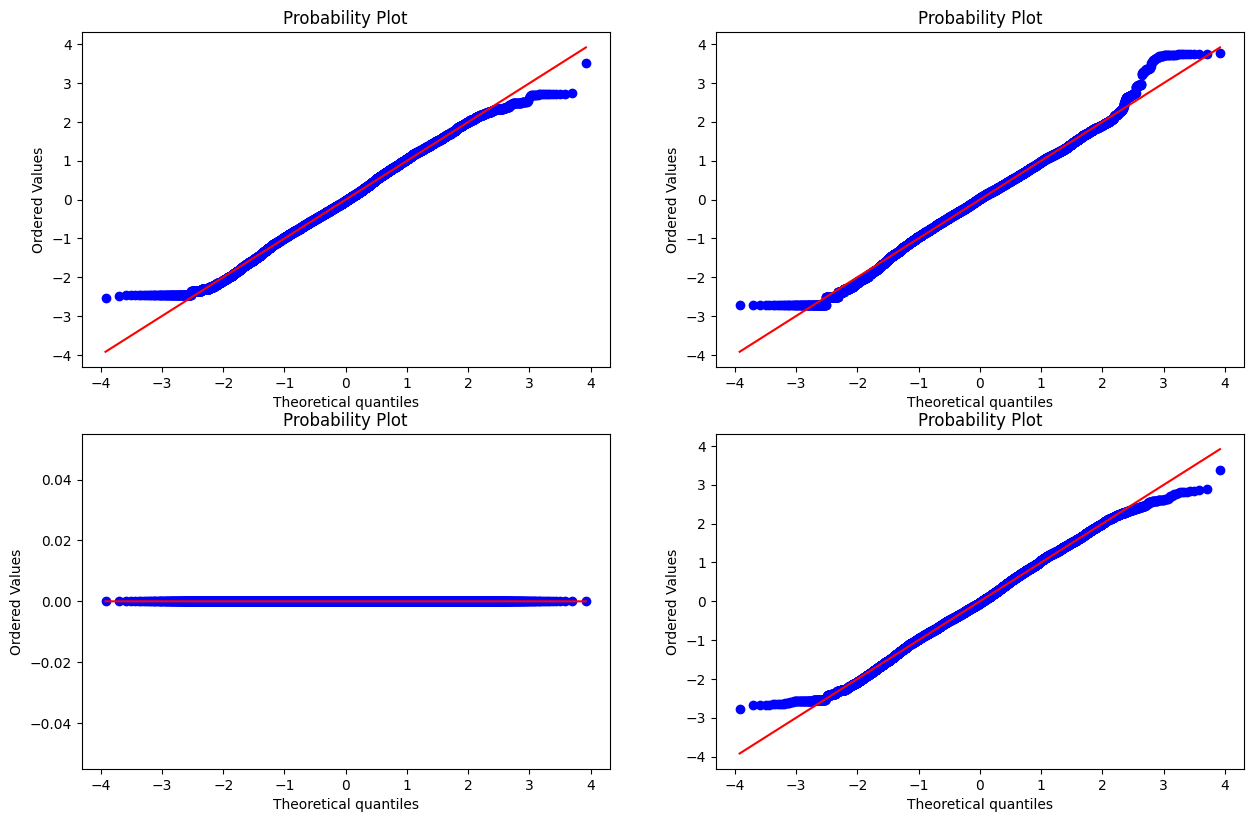

In [52]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df_trans['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df_trans['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df_trans['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df_trans['Fertilizer'], dist = 'norm', plot = plt)

plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
print("Training Accuracy : ",r2_score(y_train,y_pred_train))

y_pred_test = lr.predict(x_test)
print("Test Accuracy : ",r2_score(y_test,y_pred_test))

Training Accuracy :  0.8528573757796829
Test Accuracy :  0.8021979877171348


In [54]:
# to store accuracy value
train_accu = []
test_accu = []

In [55]:
lr.fit(x_train_transform1, y_train)

y_pred_train_ = lr.predict(x_train_transform1)
y_pred_test_ = lr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train,y_pred_train_))
test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8567968729053774

Test Accuracy :  0.8201312159764604


In [56]:
x1 = df_trans.copy()

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x1

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x1.columns

In [58]:
vif

,Variance Inflation Factor,Features
0,212.187639,Area
1,19.937214,Production
2,NaN,Annual_Rainfall
3,211.681152,Fertilizer
4,4.403901,Crop_Arhar/Tur
...,...,...
87,1.332008,State_Telangana
88,1.443371,State_Tripura
89,1.673864,State_Uttar Pradesh
90,1.696126,State_Uttarakhand


In [59]:
x2 = x1.copy()

In [60]:
x2.drop(['Area'], axis = 1, inplace=True)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [62]:
vif

,Variance Inflation Factor,Features
0,19.557460,Production
1,NaN,Annual_Rainfall
2,18.453239,Fertilizer
3,4.399368,Crop_Arhar/Tur
4,4.580361,Crop_Bajra
...,...,...
86,1.319221,State_Telangana
87,1.438669,State_Tripura
88,1.673644,State_Uttar Pradesh
89,1.694360,State_Uttarakhand


In [63]:
x2.drop(['Production'], axis = 1, inplace=True)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [65]:
vif

,Variance Inflation Factor,Features
0,NaN,Annual_Rainfall
1,2.233086,Fertilizer
2,4.389746,Crop_Arhar/Tur
3,4.580042,Crop_Bajra
4,2.504807,Crop_Banana
...,...,...
85,1.317227,State_Telangana
86,1.433761,State_Tripura
87,1.673310,State_Uttar Pradesh
88,1.692455,State_Uttarakhand


In [66]:
x2.head()

,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor seed,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,0.0,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,0.0,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,0.0,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.0,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,0.0,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


In [67]:
x_test1 = pd.DataFrame(x_test_transform1, columns=x_test.columns)
x_test1.drop(['Area','Production'], axis = 1, inplace = True)

In [68]:
# After applying vif
lr.fit(x2, y_train)

y_pred_train_ = lr.predict(x2)
y_pred_test_ = lr.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train,y_pred_train_))
test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8513510022009735

Test Accuracy :  0.8106762916998088


In [69]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(x_train_transform1, y_train)

y_pred_train_regr= regr.predict(x_train_transform1)
y_pred_test_regr = regr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))

train_accu.append(r2_score(y_train,y_pred_train_regr))
test_accu.append(r2_score(y_test,y_pred_test_regr))

Training Accuracy :  0.9975960181425372
Test Accuracy :  0.9861801230447145


In [70]:
# After applying vif
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()


regr.fit(x2, y_train)

y_pred_train_regr= regr.predict(x2)
y_pred_test_regr = regr.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))

train_accu.append(r2_score(y_train,y_pred_train_regr))
test_accu.append(r2_score(y_test,y_pred_test_regr))


Training Accuracy :  0.9952073381060278
Test Accuracy :  0.9744241940366907


In [71]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_transform1, y_train)

y_pred_train_svr= svr.predict(x_train_transform1)
y_pred_test_svr = svr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr))

train_accu.append(r2_score(y_train,y_pred_train_svr))
test_accu.append(r2_score(y_test,y_pred_test_svr))

Training Accuracy :  0.00780176796420029
Test Accuracy :  0.006828997822550309


In [72]:
# After applying vif
from sklearn.svm import SVR
svr = SVR()
svr.fit(x2, y_train)

y_pred_train_svr= svr.predict(x2)
y_pred_test_svr = svr.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr))

train_accu.append(r2_score(y_train,y_pred_train_svr))
test_accu.append(r2_score(y_test,y_pred_test_svr))

Training Accuracy :  0.00703777366990832
Test Accuracy :  0.006145417815922372


In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Create a Decision Tree Regressor
tree_regr = DecisionTreeRegressor()

# Fit the model
tree_regr.fit(x_train_transform1, y_train)

# Make predictions
y_pred_train_tree = tree_regr.predict(x_train_transform1)
y_pred_test_tree = tree_regr.predict(x_test_transform1)

# Calculate R2 scores for training and test sets
train_accuracy_tree = r2_score(y_train, y_pred_train_tree)
test_accuracy_tree = r2_score(y_test, y_pred_test_tree)

print("Training Accuracy (Decision Tree): ", train_accuracy_tree)
print("Test Accuracy (Decision Tree): ", test_accuracy_tree)


Training Accuracy (Decision Tree):  1.0
Test Accuracy (Decision Tree):  0.9817739244547088


In [74]:
algorithm = ['LinearRegression','LRvif','RandomForestRegressor','RFRvif','SupprtVectorRegressor','SVRvif']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy
LinearRegression,0.856797,0.820131
LRvif,0.851351,0.810676
RandomForestRegressor,0.997596,0.986180
RFRvif,0.995207,0.974424
SupprtVectorRegressor,0.007802,0.006829
SVRvif,0.007038,0.006145


In [75]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Your existing algorithm list and accuracy data
algorithm = ['LinearRegression', 'LRvif', 'RandomForestRegressor', 'RFRvif', 'SupprtVectorRegressor', 'SVRvif']
accu_data = {'Training Accuracy': train_accu, 'Test Accuracy': test_accu}
model = pd.DataFrame(accu_data, index=algorithm)

# Train and evaluate DecisionTreeRegressor
regr_dt = DecisionTreeRegressor()
regr_dt.fit(x2, y_train)

y_pred_train_dt = regr_dt.predict(x2)
y_pred_test_dt = regr_dt.predict(x_test1)

# Calculate R² scores for DecisionTreeRegressor
train_accu_dt = r2_score(y_train, y_pred_train_dt)
test_accu_dt = r2_score(y_test, y_pred_test_dt)

# Add DecisionTreeRegressor accuracy to the existing DataFrame
model.loc['DecisionTreeRegressor'] = [train_accu_dt, test_accu_dt]

print(model)


                       Training Accuracy  Test Accuracy
LinearRegression                0.856797       0.820131
LRvif                           0.851351       0.810676
RandomForestRegressor           0.997596       0.986180
RFRvif                          0.995207       0.974424
SupprtVectorRegressor           0.007802       0.006829
SVRvif                          0.007038       0.006145
DecisionTreeRegressor           1.000000       0.957384


In [ ]:
input_data=(2019,1.690919e+08,18272602364,1.640698e+06,2.904323e+10,6.256401e+07,80190.867894)
def test_model(RFR, input_features):
    predicted_output = model.predict(input_features)
    return predicted_output